## Elucidating the selection dynamics of a coevolving microbial mutualism
#### Yee Mey Seah, Wooyoung Kim, Kristina Hillesland

Microbial species can cooperate metabolically in mutualistic relationships called syntrophy. Syntrophies play a significant role in carbon degradation in anoxic environments. In order to study the evolutionary dynamics of mutualism, we sequenced the first 1000 generations of experimentally-evolving anaerobic Desulfovibrio vulgaris Hildenborough and methanogenic archaea Methanococcus maripaludis S2. These populations have been cocultured for over 4000 generations, in conditions that require both microbes to cooperate for survival. D. vulgaris ferments lactate, producing hydrogen that is consumed by M. maripaludis, which in return provides a thermodynamically favorable environment for continued fermentation by D. vulgaris. We identified allele frequency changes that suggest selection fluctuates during the establishment of the nascent mutualism. While negative frequency-dependent selection is more often used to model the coevolutionary dynamics of antagonistic host-parasite relationship, we demonstrate that negative frequency-dependent selection is also observed during the evolution of mutualism. This can occur due to mismatch in mutualist partner quality and compatibility – a rare genotype is selected for by a common mutualist partner, but the common mutualist partner fitness is negatively affected by the rare genotype, causing it to decline in frequency while another genotype of the partner species becomes common. The whole population sequencing approach allows us to now study the coevolutionary genomics of mutualism, which had been more commonly investigated through phenotypic traits, and gives us insight into the reciprocal changes in both partners’ genomes.

##### Tasks
1. ~~List all accepted mutations based on breseq evidence, and include those that did not meet frequency threshold in earlier generations.~~
2. ~~Make frequency plots.~~
3. Estimate selection coefficients of bi-allelic SNPs. See grc2019.Rmd.   
    3a. ~~Get number of reads supporting ref and alt.~~    
    3b. ~~Use lme4 package in R to fit GLMM (see SI appendix from Papkou et al., 2018)~~
    
    3c. Use emmeans package in R to calculate s (see SI appendix from Papkou et al., 2018)
4. Make Muller plots.
5. ~~Replace generations 100, 300, and 500 with same generations from Stahl lab sequences~~

### Population allele frequencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_mutations.csv and _evidence.csv files generated with rd_filter_mutations/01_gd_to_dataframe.py for the following samples: Stahl lab's UA3-15_TGCAGCTA-CCTAGAGT, UA3-45_GCGTAGTA-CCTAGAGT, and UA3-76_ATGCGCAG-AAGGCTAT, and our lab's UE3780, UE31000, UE31100, UE31200, UE31500, UE31600, UE31700, UE31800, UE31900, UE32000, UE32100, UE32200, UE32300, UE32400, UE32600, UE32800, UE33000.

Files were then concatenated for downstream analyses.

```
cat *_mutations.csv > tmp.csv
awk ' /^sample/ && FNR > 1 {next} {print $0} ' tmp.csv > ua3s_3000_mutations.csv

cat *_evidence.csv > tmp.csv
awk ' /^sample/ && FNR > 1 {next} {print $0} ' tmp.csv > ua3s_3000_evidence.csv
```

In [176]:
ua3_mutations = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/ua3s_3000_mutations.csv')
ua3_evidence = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/ua3s_3000_evidence.csv')

In [3]:
#ancestor_mut = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/Ancestor_mutations.csv')
#ancestor_ev = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/Ancestor_evidence.csv')
#d2m1_mut = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/D2M1_mutations.csv')
#d2m1_ev = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/D2M1_evidence.csv')

In [4]:
#ua3_mutations = pd.concat([d2m1_mut, ua3_mutations], ignore_index=True, sort=False)
#ua3_evidence = pd.concat([d2m1_ev, ua3_evidence], ignore_index=True, sort=False)

In [177]:
#Edit position column for JC evidence to reflect mutation position. 
#Original JC position values copied to new column, jc_mut_position
ua3_evidence['jc_mut_position'] = ua3_evidence['position']
ua3_evidence.position = ua3_evidence.position.mask(ua3_evidence.entry_type == 'JC', ua3_evidence.position + 1)

#https://stackoverflow.com/questions/41534428/how-do-i-perform-a-math-operation-on-a-python-pandas-dataframe-column-but-only
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mask.html

In [178]:
ua3_evidence.to_csv('~/Repositories/dvh_mms2/notebooks/data_exploration/input/ua3s_3000_evidence_jc_edit.csv', index=False)

In [179]:
ua3_rejected = ua3_evidence[pd.isna(ua3_evidence.reject) == False]
ua3_rejected

sample line  generation entry_type  entry_id  genome_id  position  \
1          D2M1  UA3           0         RA       178  NC_002937     22434   
2          D2M1  UA3           0         RA       179  NC_002937     22439   
3          D2M1  UA3           0         RA       180  NC_002937     22442   
4          D2M1  UA3           0         RA       181  NC_002937     29498   
5          D2M1  UA3           0         RA       182  NC_002937     29503   
6          D2M1  UA3           0         RA       183  NC_002937     29508   
7          D2M1  UA3           0         RA       184  NC_002937     29509   
8          D2M1  UA3           0         RA       185  NC_002937     29512   
10         D2M1  UA3           0         RA       187  NC_002937     43916   
11         D2M1  UA3           0         RA       188  NC_002937     43928   
12         D2M1  UA3           0         RA       189  NC_002937     66459   
13         D2M1  UA3           0         RA       190  NC_002937     66460   
14         D2M1  UA3           0         RA       191  NC_002937     68527   
15         D2M1  UA3           0         RA       192  NC_002937     72612   
16         D2M1  UA3           0         RA       193  NC_002937     72618   
17         D2M1  UA3           0         RA       194  NC_002937     72619   
18         D2M1  UA3           0         RA       195  NC_002937     82380   
19         D2M1  UA3           0         RA       196  NC_002937     82385   
20         D2M1  UA3           0         RA       197  NC_002937     83994   
21         D2M1  UA3           0         RA       198  NC_002937     83995   
22         D2M1  UA3           0         RA       199  NC_002937     84002   
23         D2M1  UA3           0         RA       200  NC_002937     84003   
24         D2M1  UA3           0         RA       201  NC_002937     84004   
25         D2M1  UA3           0         RA       202  NC_002937     86948   
26         D2M1  UA3           0         RA       203  NC_002937     86950   
27         D2M1  UA3           0         RA       204  NC_002937     86952   
28         D2M1  UA3           0         RA       205  NC_002937     86957   
29         D2M1  UA3           0         RA       206  NC_002937     86958   
30         D2M1  UA3           0         RA       207  NC_002937     86959   
31         D2M1  UA3           0         RA       208  NC_002937     89990   
...         ...  ...         ...        ...       ...        ...       ...   
405291  UE3-780  UE3         780         JC     19816  NC_005791   1380803   
405292  UE3-780  UE3         780         JC     19817  NC_005791   1409509   
405296  UE3-780  UE3         780         JC     19821  NC_005791   1409779   
405298  UE3-780  UE3         780         JC     19823  NC_005791   1427184   
405299  UE3-780  UE3         780         JC     19824  NC_005791   1502885   
405301  UE3-780  UE3         780         JC     19826  NC_005863      2847   
405302  UE3-780  UE3         780         JC     19827  NC_005863     10891   
405304  UE3-780  UE3         780         JC     19829  NC_005863     11471   
405307  UE3-780  UE3         780         JC     19832  NC_005863     17209   
405309  UE3-780  UE3         780         JC     19834  NC_005863     21643   
405310  UE3-780  UE3         780         JC     19835  NC_005863     33495   
405313  UE3-780  UE3         780         JC     19838  NC_005863     47805   
405314  UE3-780  UE3         780         JC     19839  NC_005863     53468   
405315  UE3-780  UE3         780         JC     19840  NC_005863     55559   
405316  UE3-780  UE3         780         JC     19841  NC_005863     60629   
405320  UE3-780  UE3         780         JC     19845  NC_005863     66384   
405321  UE3-780  UE3         780         JC     19846  NC_005863     69650   
405322  UE3-780  UE3         780         JC     19847  NC_005863     69694   
405323  UE3-780  UE3         780         JC     19848  NC_005863     70301   
405324  UE3-780  UE3         78

Bash code used to extract mutations (based on genome id and position) that are rejected in one timepoint and accepted in another. The logic is to first find unique lines based on entry type, genome id, position, and reject status (```-f4,6,7,10```). This is followed by dropping only the reject status column, and getting the counts for each unique line. Counts greater than 1 (```egrep "\s+[2-9]+\s+```) imply that before the second ```cut```, there were lines with the same entry type, genome id and position, but different reject status.

```
cat ua3_3000_evidence_jc_edit.csv | cut -d, -f4,6,7,10 | sort | uniq | cut -d, -f 1,2,3 | uniq -c | egrep "\s+[2-9]+\s+" | tr -s ' ' | cut -d' ' -f3 > ua3s_3000_evid_multiple.csv
```

In [180]:
dup_muts = pd.read_csv('~/Repositories/dvh_mms2/notebooks/data_exploration/input/ua3s_3000_evid_multiple.csv', header=None)
dup_muts.rename(columns = {0: 'entry_type', 1: 'genome_id', 2: 'position'}, inplace=True)
muts_with_rejects = pd.merge(ua3_mutations, dup_muts, how='inner', on=['genome_id', 'position'])
muts_with_rejects.rename(columns = {'entry_type_y': 'entry_type'}, inplace=True)
muts_with_rejects

sample line  generation entry_type_x  entry_id evidence_id  genome_id  \
0         D2M1  UA3           0          DEL        28        5770  NC_002937   
1     UE3-1000  UE3        1000          DEL        65       19769  NC_002937   
2         D2M1  UA3           0          DEL        29        5771  NC_002937   
3         D2M1  UA3           0          SNP        42         672  NC_002937   
4     UE3-1000  UE3        1000          SNP        98        5268  NC_002937   
5     UE3-1100  UE3        1100          SNP       108        4597  NC_002937   
6     UE3-1200  UE3        1200          SNP       125        3954  NC_002937   
7     UE3-1500  UE3        1500          SNP       134        4316  NC_002937   
8     UE3-1600  UE3        1600          SNP       138        4315  NC_002937   
9     UE3-1700  UE3        1700          SNP       134        3279  NC_002937   
10    UE3-1800  UE3        1800          SNP       139        3985  NC_002937   
11    UE3-1900  UE3        1900          SNP       124        3406  NC_002937   
12    UE3-2000  UE3        2000          SNP       130        3433  NC_002937   
13    UE3-2100  UE3        2100          SNP       131        3850  NC_002937   
14    UE3-2200  UE3        2200          SNP       105        5206  NC_002937   
15    UE3-2300  UE3        2300          SNP       103        7194  NC_002937   
16    UE3-2400  UE3        2400          SNP       100        4857  NC_002937   
17    UE3-2600  UE3        2600          SNP        93        5204  NC_002937   
18    UE3-2800  UE3        2800          SNP        78        6032  NC_002937   
19     UE3-780  UE3         780          SNP        94        4931  NC_002937   
20        D2M1  UA3           0          SNP        45         691  NC_002937   
21        D2M1  UA3           0          SNP        46         692  NC_002937   
22        D2M1  UA3           0          SNP        47         693  NC_002937   
23        D2M1  UA3           0          SNP        48         694  NC_002937   
24        D2M1  UA3           0          SNP        58         771  NC_002937   
25     UA3s-15  UA3         100          SNP        87        1688  NC_002937   
26        D2M1  UA3           0          SNP        59         772  NC_002937   
27     UA3s-15  UA3         100          SNP        88        1689  NC_002937   
28        D2M1  UA3           0          SNP        61         792  NC_002937   
29    UE3-1000  UE3        1000          SNP       125        6673  NC_002937   
...        ...  ...         ...          ...       ...         ...        ...   
4578  UE3-2800  UE3        2800          SNP       191       10841  NC_002937   
4579  UE3-3000  UE3        3000          SNP       107       66183  NC_002937   
4580   UE3-780  UE3         780          SNP       217        8277  NC_002937   
4581  UE3-2600  UE3        2600          DEL       239       18280  NC_002937   
4582  UE3-2600  UE3        2600          SNP       254       10971  NC_005791   
4583  UE3-2800  UE3        2800          SNP       208       13616  NC_005791   
4584  UE3-2600  UE3        2600          SNP       289       13488  NC_005791   
4585  UE3-2800  UE3        2800          SNP       242       17901  NC_005791   
4586  UE3-2800  UE3        2800          SNP        16        3001  NC_002937   
4587  UE3-2800  UE3        2800          SNP       192       10842  NC_002937   
4588  UE3-3000  UE3        3000          SNP       108       66185  NC_002937   
4589  UE3-2800  UE3        2800          DEL       238       24700  NC_005791   
4590   UE3-780  UE3         780          DEL       275       19789  NC_005791   
4591  UE3-2800  UE3        2800          SNP       241       17900  NC_005791   
4592  UE3-2800  UE3        2800          SNP       244       18863  NC_005791   
4593  UE3-3000  UE3        3000          SNP       109       66186  NC_002937   
4594  UE3-3000  UE3        3000          SNP       110       66189  NC_002937   
4595  UE3-3000  UE3        3000        

In [181]:
rejected_muts = pd.merge(ua3_rejected, muts_with_rejects[['genome_id', 'position', 'entry_type']], how='inner', on=['genome_id', 'position', 'entry_type'])
rejected_muts.insert(5, 'evidence_id', np.nan)
rejected_muts.insert(8, 'mutation_detail', np.nan)
rejected_muts.insert(9, 'frequency', np.nan)
rejected_muts.insert(10, 'gene_product', np.nan)
rejected_muts.insert(11, 'evidence_type', np.nan)
rejected_muts.drop('jc_mut_position', axis=1, inplace=True)

In [182]:
rejected_muts.drop_duplicates(inplace=True)
rejected_muts

sample line  generation entry_type  entry_id  evidence_id  genome_id  \
0          D2M1  UA3           0         RA       189          NaN  NC_002937   
2       UA3s-15  UA3         100         RA       215          NaN  NC_002937   
4          D2M1  UA3           0         RA       190          NaN  NC_002937   
6       UA3s-15  UA3         100         RA       216          NaN  NC_002937   
8          D2M1  UA3           0         RA       247          NaN  NC_002937   
23      UA3s-15  UA3         100         RA       344          NaN  NC_002937   
38      UA3s-45  UA3         300         RA       348          NaN  NC_002937   
53     UE3-1600  UE3        1600         RA       858          NaN  NC_002937   
68         D2M1  UA3           0         RA       248          NaN  NC_002937   
84      UA3s-15  UA3         100         RA       345          NaN  NC_002937   
100     UA3s-76  UA3         500         RA       362          NaN  NC_002937   
116        D2M1  UA3           0         RA       249          NaN  NC_002937   
130        D2M1  UA3           0         RA       250          NaN  NC_002937   
148     UA3s-15  UA3         100         RA       350          NaN  NC_002937   
166        D2M1  UA3           0         RA       258          NaN  NC_002937   
167     UA3s-15  UA3         100         RA       368          NaN  NC_002937   
168     UA3s-76  UA3         500         RA       392          NaN  NC_002937   
169        D2M1  UA3           0         RA       259          NaN  NC_002937   
170     UA3s-15  UA3         100         RA       371          NaN  NC_002937   
171     UA3s-76  UA3         500         RA       395          NaN  NC_002937   
172        D2M1  UA3           0         RA       260          NaN  NC_002937   
173     UA3s-15  UA3         100         RA       372          NaN  NC_002937   
174     UA3s-76  UA3         500         RA       396          NaN  NC_002937   
175        D2M1  UA3           0         RA       360          NaN  NC_002937   
177     UA3s-15  UA3         100         RA       509          NaN  NC_002937   
179        D2M1  UA3           0         RA       422          NaN  NC_002937   
180     UA3s-15  UA3         100         RA       609          NaN  NC_002937   
181     UA3s-45  UA3         300         RA       597          NaN  NC_002937   
182        D2M1  UA3           0         RA       423          NaN  NC_002937   
184     UA3s-15  UA3         100         RA       610          NaN  NC_002937   
...         ...  ...         ...        ...       ...          ...        ...   
22921  UE3-3000  UE3        3000         RA     33151          NaN  NC_002937   
22923  UE3-3000  UE3        3000         RA     38992          NaN  NC_002937   
22926  UE3-3000  UE3        3000         RA     42462          NaN  NC_002937   
22927  UE3-3000  UE3        3000         RA     44758          NaN  NC_002937   
22929  UE3-3000  UE3        3000         RA     52193          NaN  NC_002937   
22931  UE3-3000  UE3        3000         RA     61250          NaN  NC_002937   
22971  UE3-3000  UE3        3000         RA     61251          NaN  NC_002937   
23011  UE3-3000  UE3        3000         RA     64204          NaN  NC_002937   
23012  UE3-3000  UE3        3000         RA     80963          NaN  NC_005791   
23013  UE3-3000  UE3        3000         RA     96633          NaN  NC_005791   
23015  UE3-3000  UE3        3000         RA     97666          NaN  NC_005791   
23018  UE3-3000  UE3        3000         RA    118243          NaN  NC_005863   
23019  UE3-3000  UE3        3000         JC    123816          NaN  NC_002937   
23032  UE3-3000  UE3        3000         JC    123817          NaN  NC_002937   
23045  UE3-3000  UE3        3000         JC    123818          NaN  NC_002937   
23058  UE3-3000  UE3        3000         JC    123819          NaN  NC_002937   
23071  UE3-3000  UE3        3000         JC    123820          NaN  NC_002937   
23084  UE3-3000  UE3        3000        

In [183]:
new_ua3 = pd.concat([ua3_mutations,rejected_muts], ignore_index=True, sort=False)
new_ua3.drop_duplicates(inplace=True)
new_ua3['line'] = 'UA3'
new_ua3

sample line  generation entry_type  entry_id evidence_id  genome_id  \
0          D2M1  UA3           0        SNP         1         177  NC_002937   
1          D2M1  UA3           0        DEL         2        5695  NC_002937   
2          D2M1  UA3           0        INS         3         186  NC_002937   
3          D2M1  UA3           0        DEL         4        5701  NC_002937   
4          D2M1  UA3           0        DEL         5        5706  NC_002937   
5          D2M1  UA3           0        DEL         6        5709  NC_002937   
6          D2M1  UA3           0        SNP         7         235  NC_002937   
7          D2M1  UA3           0        INS         8         244  NC_002937   
8          D2M1  UA3           0        DEL         9        5724  NC_002937   
9          D2M1  UA3           0        DEL        10        5729  NC_002937   
10         D2M1  UA3           0        DEL        11        5731  NC_002937   
11         D2M1  UA3           0        DEL        12        5732  NC_002937   
12         D2M1  UA3           0        DEL        13        5741  NC_002937   
13         D2M1  UA3           0        DEL        14        5742  NC_002937   
14         D2M1  UA3           0        MOB        15   5745,5746  NC_002937   
15         D2M1  UA3           0        SNP        16         418  NC_002937   
16         D2M1  UA3           0        DEL        17        5751  NC_002937   
17         D2M1  UA3           0        DEL        18        5752  NC_002937   
18         D2M1  UA3           0        DEL        19         458  NC_002937   
19         D2M1  UA3           0        DEL        20        5755  NC_002937   
20         D2M1  UA3           0        DEL        21        5756  NC_002937   
21         D2M1  UA3           0        SUB        22        5757  NC_002937   
22         D2M1  UA3           0        DEL        23        5758  NC_002937   
23         D2M1  UA3           0        DEL        24        5762  NC_002937   
24         D2M1  UA3           0        DEL        25        5764  NC_002937   
25         D2M1  UA3           0        INS        26         528  NC_002937   
26         D2M1  UA3           0        DEL        27         539  NC_002937   
27         D2M1  UA3           0        DEL        28        5770  NC_002937   
28         D2M1  UA3           0        DEL        29        5771  NC_002937   
29         D2M1  UA3           0        INS        30         565  NC_002937   
...         ...  ...         ...        ...       ...         ...        ...   
11762  UE3-3000  UA3        3000         RA     33151         NaN  NC_002937   
11763  UE3-3000  UA3        3000         RA     38992         NaN  NC_002937   
11764  UE3-3000  UA3        3000         RA     42462         NaN  NC_002937   
11765  UE3-3000  UA3        3000         RA     44758         NaN  NC_002937   
11766  UE3-3000  UA3        3000         RA     52193         NaN  NC_002937   
11767  UE3-3000  UA3        3000         RA     61250         NaN  NC_002937   
11768  UE3-3000  UA3        3000         RA     61251         NaN  NC_002937   
11769  UE3-3000  UA3        3000         RA     64204         NaN  NC_002937   
11770  UE3-3000  UA3        3000         RA     80963         NaN  NC_005791   
11771  UE3-3000  UA3        3000         RA     96633         NaN  NC_005791   
11772  UE3-3000  UA3        3000         RA     97666         NaN  NC_005791   
11773  UE3-3000  UA3        3000         RA    118243         NaN  NC_005863   
11774  UE3-3000  UA3        3000         JC    123816         NaN  NC_002937   
11775  UE3-3000  UA3        3000         JC    123817         NaN  NC_002937   
11776  UE3-3000  UA3        3000         JC    123818         NaN  NC_002937   
11777  UE3-3000  UA3        3000         JC    123819         NaN  NC_002937   
11778  UE3-3000  UA3        3000         JC    123820         NaN  NC_002937   
11779  UE3-3000  UA3        3000         JC    123843         NaN  NC_002937   
11780  UE

In [184]:
new_ua3.to_csv('~/Repositories/dvh_mms2/notebooks/data_exploration/output/new_ua3s_3000_mutations.csv', index=False)

In [185]:
# test 
new_ua3[new_ua3['position'] == 999707]

sample line  generation entry_type  entry_id evidence_id  genome_id  \
1165  UE3-1100  UA3        1100        SNP        42        2958  NC_002937   
1527  UE3-1200  UA3        1200        SNP        48        2394  NC_002937   
1906  UE3-1500  UA3        1500        SNP        47        2752  NC_002937   
2724  UE3-1700  UA3        1700        SNP        51        1986  NC_002937   
3104  UE3-1800  UA3        1800        SNP        57        2484  NC_002937   
8582   UA3s-15  UA3         100         RA       750         NaN  NC_002937   
8583   UA3s-45  UA3         300         RA       738         NaN  NC_002937   
8584   UA3s-76  UA3         500         RA       895         NaN  NC_002937   
8585  UE3-1000  UA3        1000         RA      3156         NaN  NC_002937   
8586  UE3-1600  UA3        1600         RA      2518         NaN  NC_002937   
8587  UE3-1900  UA3        1900         RA      1996         NaN  NC_002937   
8588  UE3-2000  UA3        2000         RA      2276         NaN  NC_002937   
8589  UE3-2100  UA3        2100         RA      2357         NaN  NC_002937   
8590  UE3-2200  UA3        2200         RA      3083         NaN  NC_002937   
8591  UE3-2300  UA3        2300         RA      4550         NaN  NC_002937   
8592  UE3-2400  UA3        2400         RA      2894         NaN  NC_002937   
8593  UE3-2600  UA3        2600         RA      3247         NaN  NC_002937   
8594  UE3-2800  UA3        2800         RA      3863         NaN  NC_002937   
8595  UE3-3000  UA3        3000         RA     23814         NaN  NC_002937   
8596   UE3-780  UA3         780         RA      3038         NaN  NC_002937   

      position mutation_detail  frequency  ... ALT            reject  \
1165    999707               T   0.050852  ...   T               NaN   
1527    999707               T   0.103428  ...   T               NaN   
1906    999707               T   0.086884  ...   T               NaN   
2724    999707               T   0.052561  ...   T               NaN   
3104    999707               T   0.067894  ...   T               NaN   
8582    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8583    999707             NaN        NaN  ...   T   STRAND_COVERAGE   
8584    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8585    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8586    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8587    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8588    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8589    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8590    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8591    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8592    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8593    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8594    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8595    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   
8596    999707             NaN        NaN  ...   T  FREQUENCY_CUTOFF   

        prediction polymorphism_frequency major_cov minor_cov  total_cov  \
1165  polymorphism               0.050852     205.0      11.0      216.0   
1527  polymorphism               0.103428     233.0      27.0      260.0   
1906  polymorphism               0.086884     168.0      16.0      184.0   
2724  polymorphism               0.052561     306.0      17.0      323.0   
3104  polymorphism               0.067894     315.0      23.0      338.0   
8582  polymorphism               0.049818     133.0       7.0      140.0   
8583  polymorphism               0.057374      82.0       5.0       87.0   
8584  polymorphism               0.034950     110.0       4.0      114.0   
8585  polymorphism               0.032351     358.0      12.0      370.0   
8586  polymorphism               0.041595     253.0      11.0      264.0   

In [257]:
def dropallna_col(df):
    '''Use on data frames comprising polymorphism columns and frequency values'''
    #Drop polymorphisms that don't exist, replace remaining NA's with 0%
    retained = df.dropna(how='all', axis=1).fillna(0)
    #Round frequencies to 2 decimals.
    #Drop polymorphisms that are >=99% across all time points, replace remaining NA's with 100%
    filtered = retained.round(2).mask(retained >= 0.99).dropna(how='all', axis=1).fillna(1.0).copy()
    #Drop polymorphisms that are <=2% across all time points, replace remaining NA's with 0%
    filtered = filtered.mask(filtered <= 0.02).dropna(how='all', axis=1).fillna(0).copy()
    return filtered

In [258]:
# plotting script adapted from plot_polymorphisms.ipynb
new_ua3['polymorphism'] = new_ua3['position'].astype(str).str.cat(new_ua3['ALT'], sep=' ')
df = new_ua3[['line', 'genome_id', 'generation', 'polymorphism', 'polymorphism_frequency']].copy()
df_pvt = df.pivot_table(index=['genome_id', 'line', 'generation'], columns='polymorphism', values='polymorphism_frequency')

dvh_df = dropallna_col(df_pvt.loc['NC_002937'])
mm_df = dropallna_col(df_pvt.loc['NC_005791'])
dvplasmid_df = dropallna_col(df_pvt.loc['NC_005863'])

In [259]:
dvh_df

polymorphism     1000004 T  1000025 G  1000040 G  1000079 C  1000102 1000102  \
line generation                                                                
UA3  0                0.00       0.00       0.06       0.06             0.00   
     100              0.05       0.08       0.13       0.00             0.00   
     300              0.09       0.10       0.13       0.08             0.00   
     500              0.04       0.11       0.10       0.00             0.00   
     780              0.03       0.06       0.11       0.12             0.00   
     1000             0.05       0.07       0.12       0.10             0.00   
     1100             0.03       0.04       0.12       0.13             0.00   
     1200             0.04       0.06       0.10       0.11             0.00   
     1500             0.04       0.05       0.12       0.14             0.00   
     1600             0.00       0.07       0.12       0.12             0.00   
     1700             0.05       0.04       0.09       0.11             0.00   
     1800             0.03       0.04       0.12       0.14             0.00   
     1900             0.03       0.05       0.11       0.09             0.00   
     2000             0.05       0.07       0.11       0.09             0.07   
     2100             0.05       0.05       0.09       0.12             0.00   
     2200             0.04       0.06       0.11       0.10             0.00   
     2300             0.04       0.06       0.12       0.13             0.00   
     2400             0.03       0.04       0.11       0.13             0.00   
     2600             0.05       0.07       0.13       0.13             0.00   
     2800             0.03       0.03       0.10       0.11             0.00   
     3000             0.04       0.06       0.00       0.00             0.00   

polymorphism     1000109 G  1000115 A  1000133 G  1000139 G  1000181 G  ...  \
line generation                                                         ...   
UA3  0                0.05       0.00       0.00       0.05       0.00  ...   
     100              0.11       0.07       0.00       0.04       0.08  ...   
     300              0.09       0.08       0.05       0.08       0.09  ...   
     500              0.12       0.06       0.00       0.11       0.09  ...   
     780              0.13       0.08       0.06       0.09       0.13  ...   
     1000             0.06       0.06       0.04       0.11       0.14  ...   
     1100             0.11       0.05       0.04       0.11       0.18  ...   
     1200             0.12       0.08       0.05       0.11       0.08  ...   
     1500             0.14       0.09       0.03       0.12       0.13  ...   
     1600             0.11       0.08       0.05       0.09       0.15  ...   
     1700             0.09       0.09       0.05       0.09       0.09  ...   
     1800             0.10       0.07       0.05       0.13       0.12  ...   
     1900             0.05       0.06       0.03       0.09       0.13  ...   
     2000             0.07       0.06       0.04       0.12       0.13  ...   
     2100             0.12       0.07       0.05       0.13       0.11  ...   
     2200             0.09       0.07       0.05       0.12       0.16  ...   
     2300             0.10       0.08       0.06       0.11       0.13  ...   
     2400             0.09       0.06       0.04       0.13       0.13  ...   
     2600             0.09       0.07       0.04       0.12       0.11  ...   
     2800             0.12       0.09       0.04       0.09       0.11  ...   
     3000             0.00       0.07       0.04       0.00       0.00  ...   

polymorphism     999794 G  999800 G  999836 T  999902 T  999932 A  999938 G  \
line generation                                                               
UA3  0               0.00      0.00      0.00      0.00      0.00      0.00   
     100             0.08      0.09      0.03      0.11      0.11      0.12   
     300             0.08

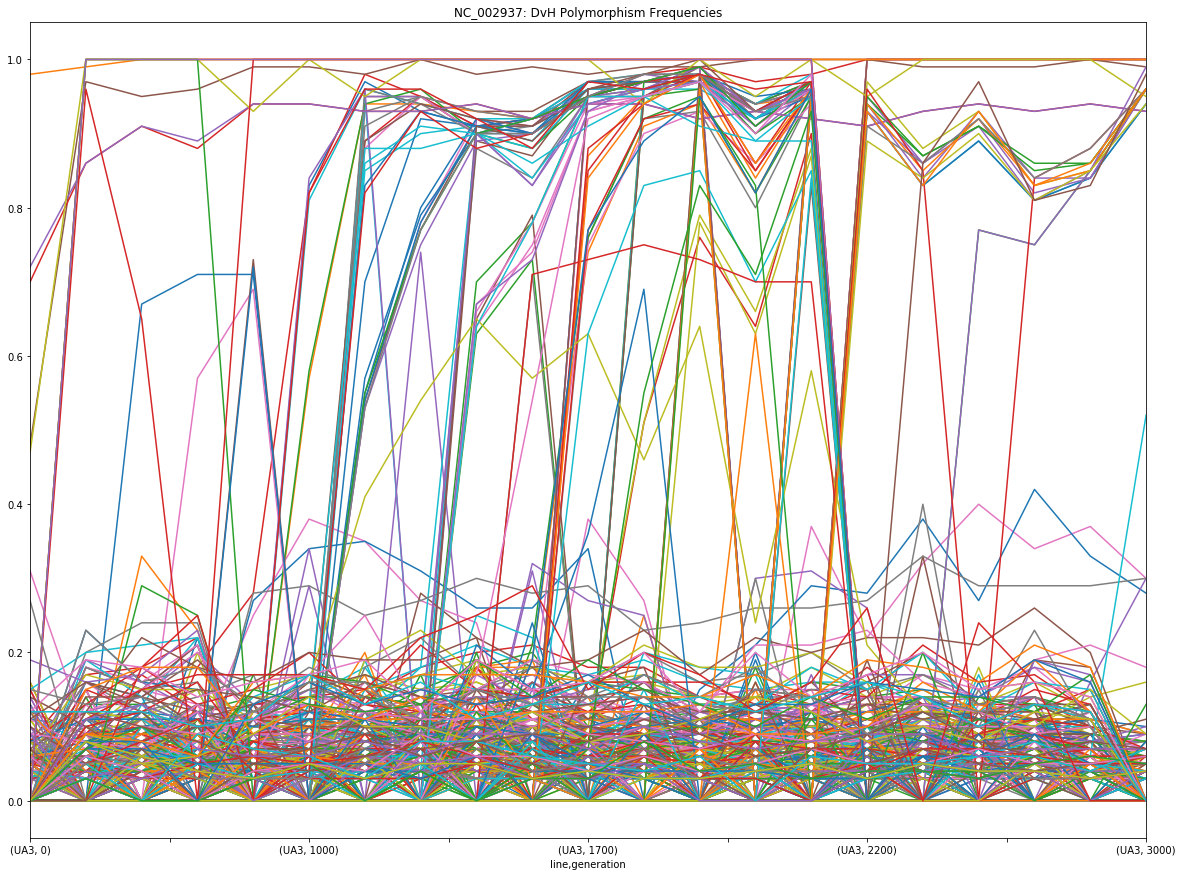

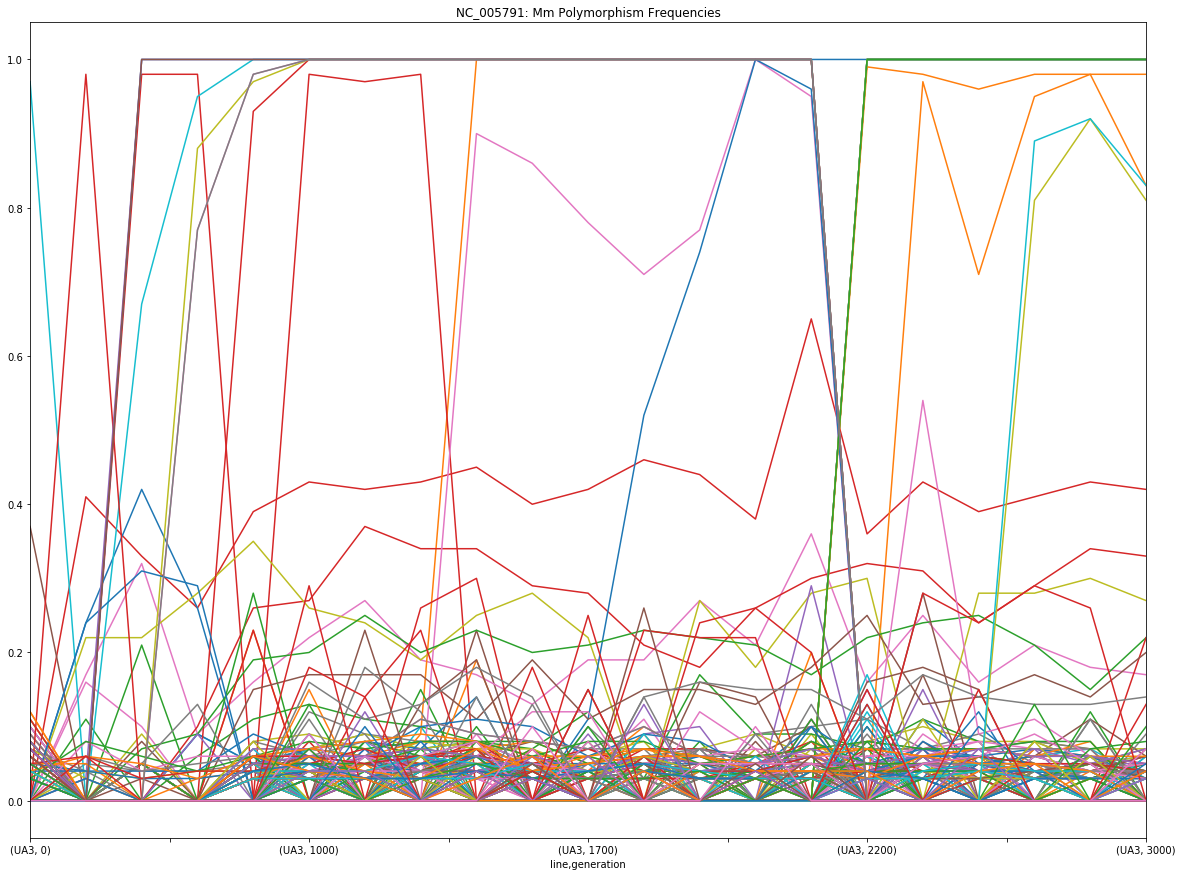

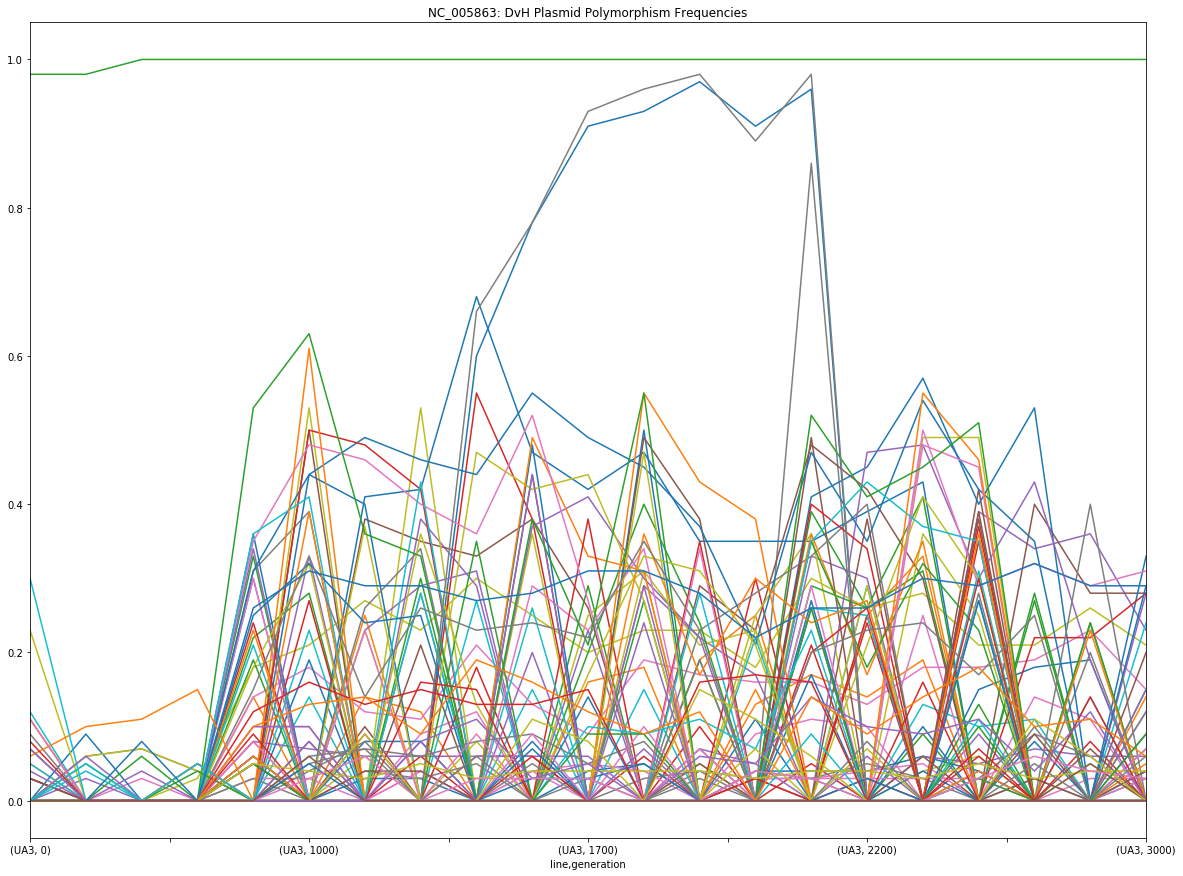

In [269]:
%matplotlib inline
dvh_df.plot(figsize = (20,15), legend=False, title='NC_002937: DvH Polymorphism Frequencies')
plt.savefig('figures/grc2019ua3dvhcorrected.png')

mm_df.plot(figsize = (20,15), legend=False, title='NC_005791: Mm Polymorphism Frequencies')
plt.savefig('figures/grc2019ua3mmcorrected.png')

dvplasmid_df.plot(figsize = (20,15), legend=False, title='NC_005863: DvH Plasmid Polymorphism Frequencies')
plt.savefig('figures/grc2019ua3dvplasmidcorrected.png')

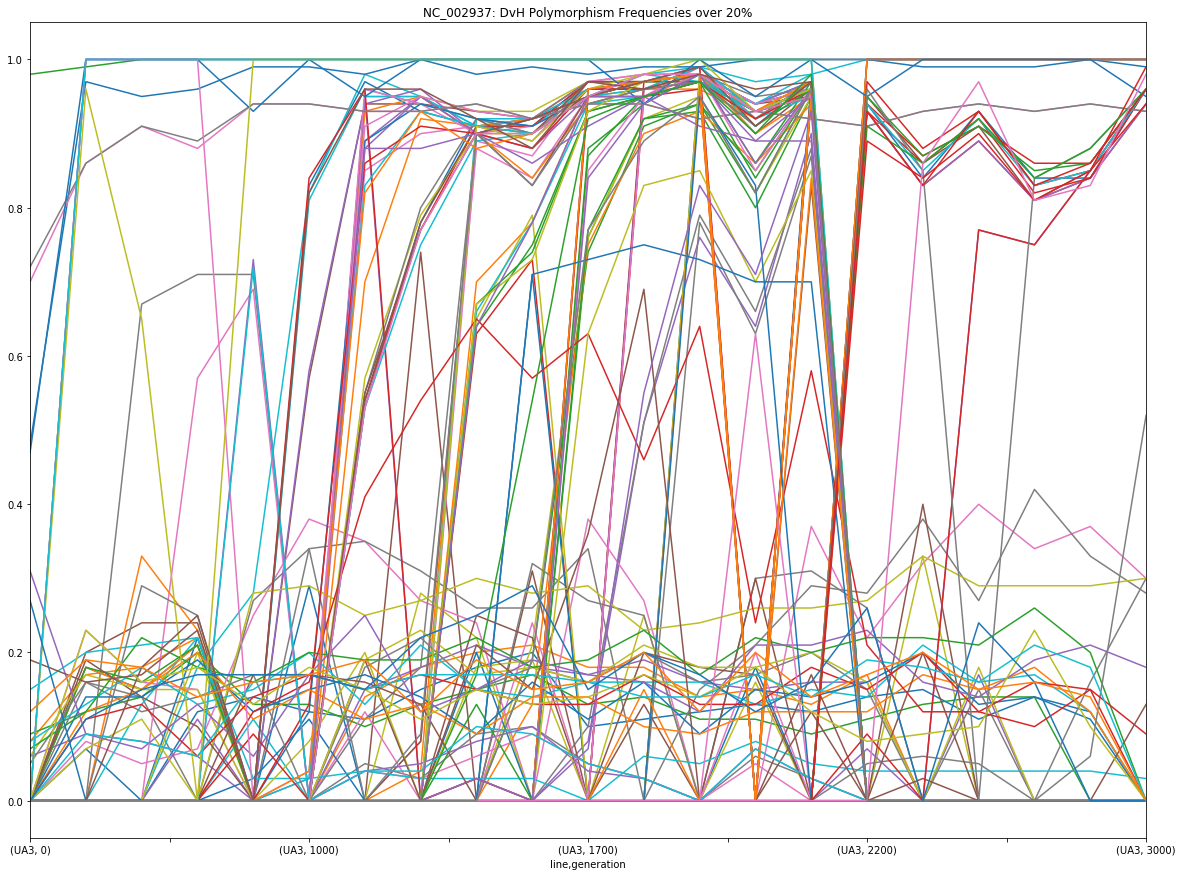

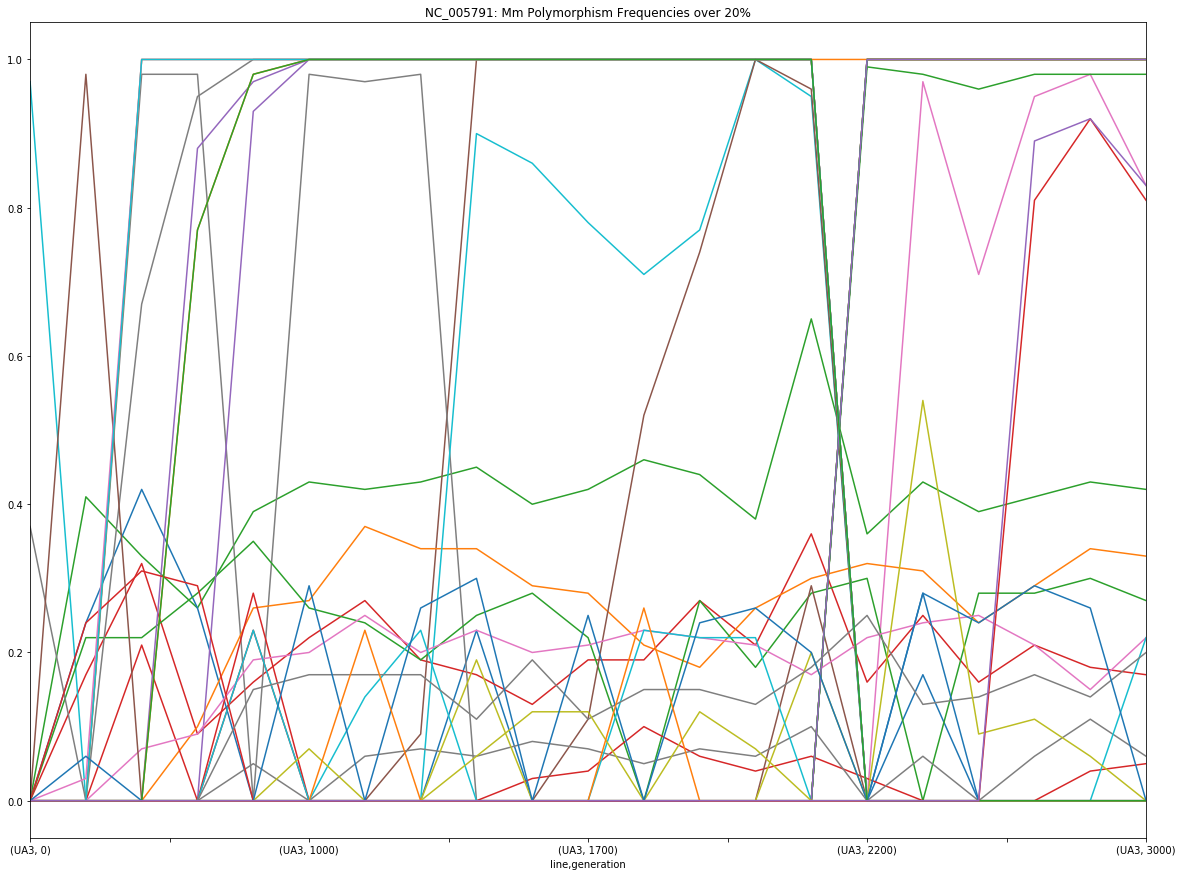

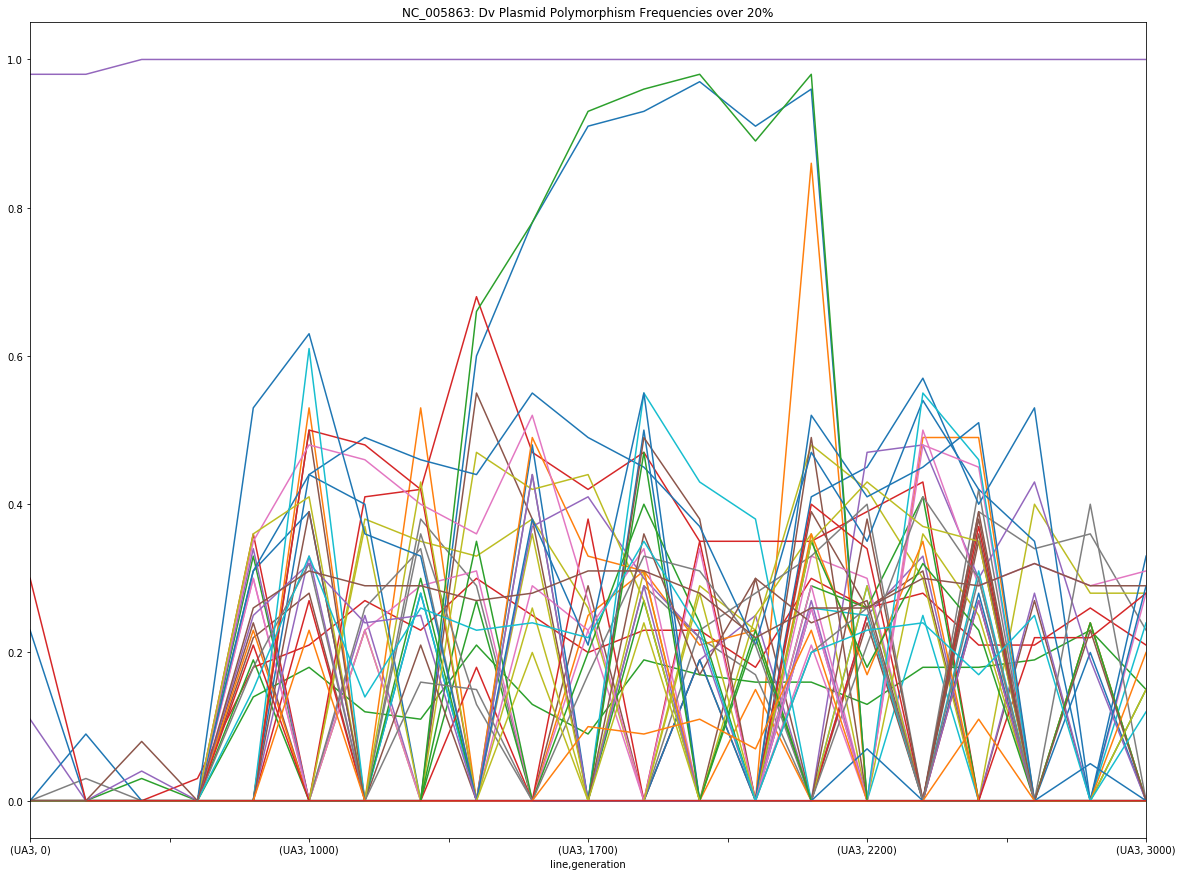

In [270]:
# To filter out mutations that never increase beyond 20% across all time points
dvh_df[dvh_df.mask(dvh_df < 0.2).dropna(how = 'all', axis=1).columns].plot(figsize = (20,15), legend=False, title='NC_002937: DvH Polymorphism Frequencies over 20%')
plt.savefig('figures/grc2019ua3dvhcorrected_min20.png')
mm_df[mm_df.mask(mm_df < 0.2).dropna(how = 'all', axis=1).columns].plot(figsize = (20,15), legend=False, title='NC_005791: Mm Polymorphism Frequencies over 20%')
plt.savefig('figures/grc2019ua3mmcorrected_min20.png')
dvplasmid_df[dvplasmid_df.mask(dvplasmid_df < 0.2).dropna(how = 'all', axis=1).columns].plot(figsize = (20,15), legend=False, title='NC_005863: Dv Plasmid Polymorphism Frequencies over 20%')
plt.savefig('figures/grc2019ua3dvplasmidcorrected_min20.png')

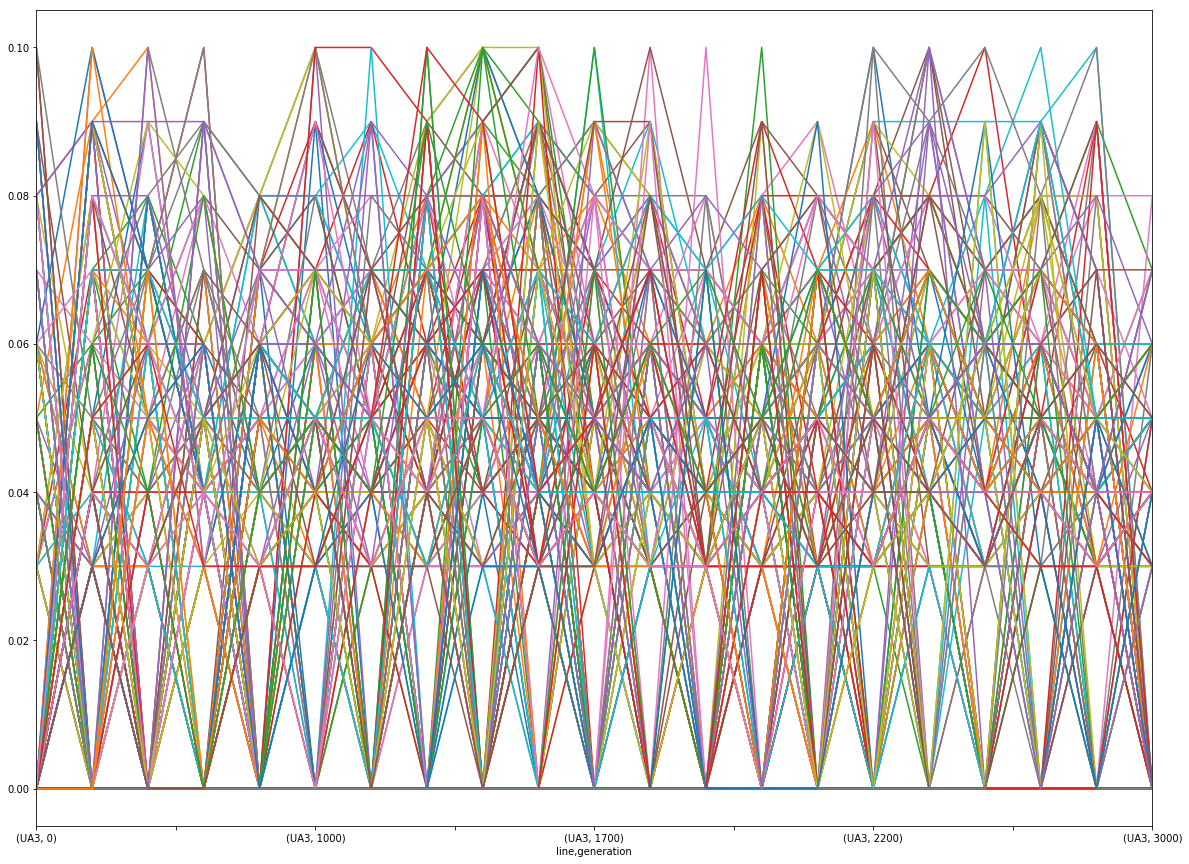

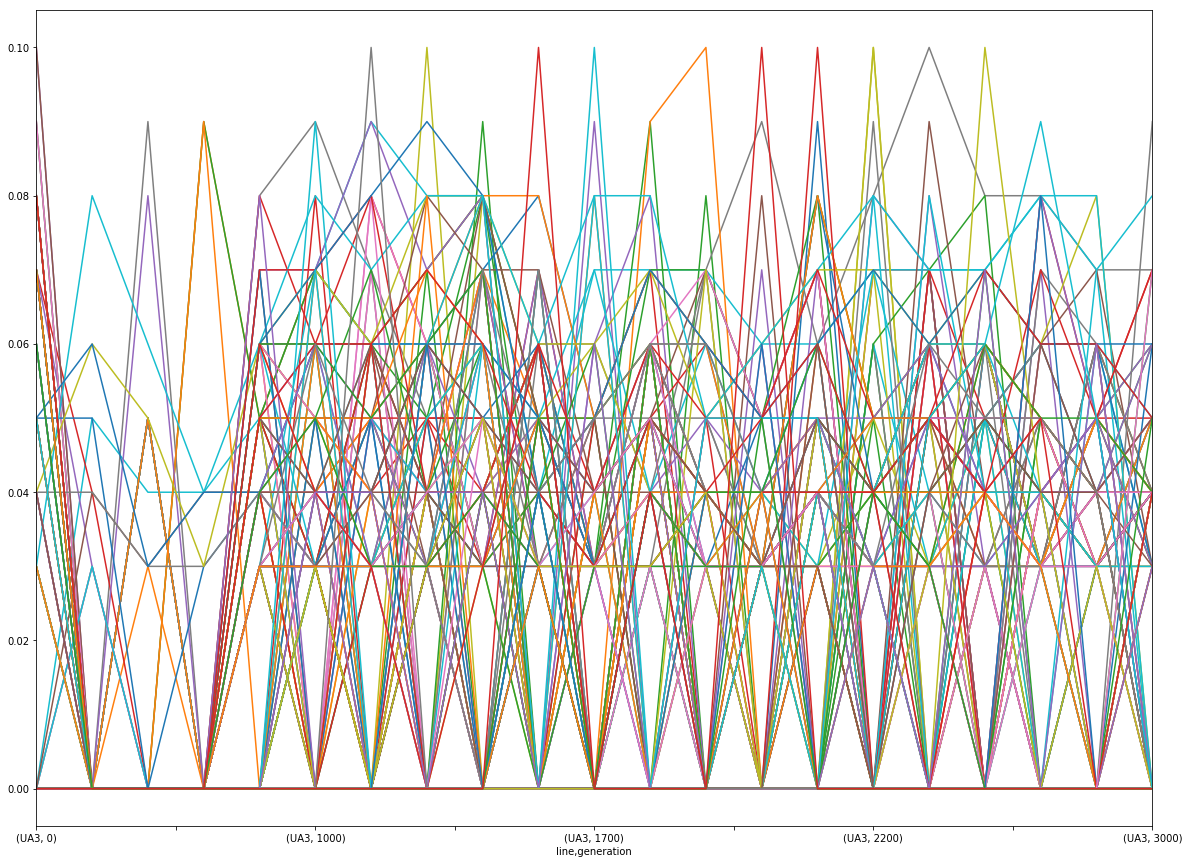

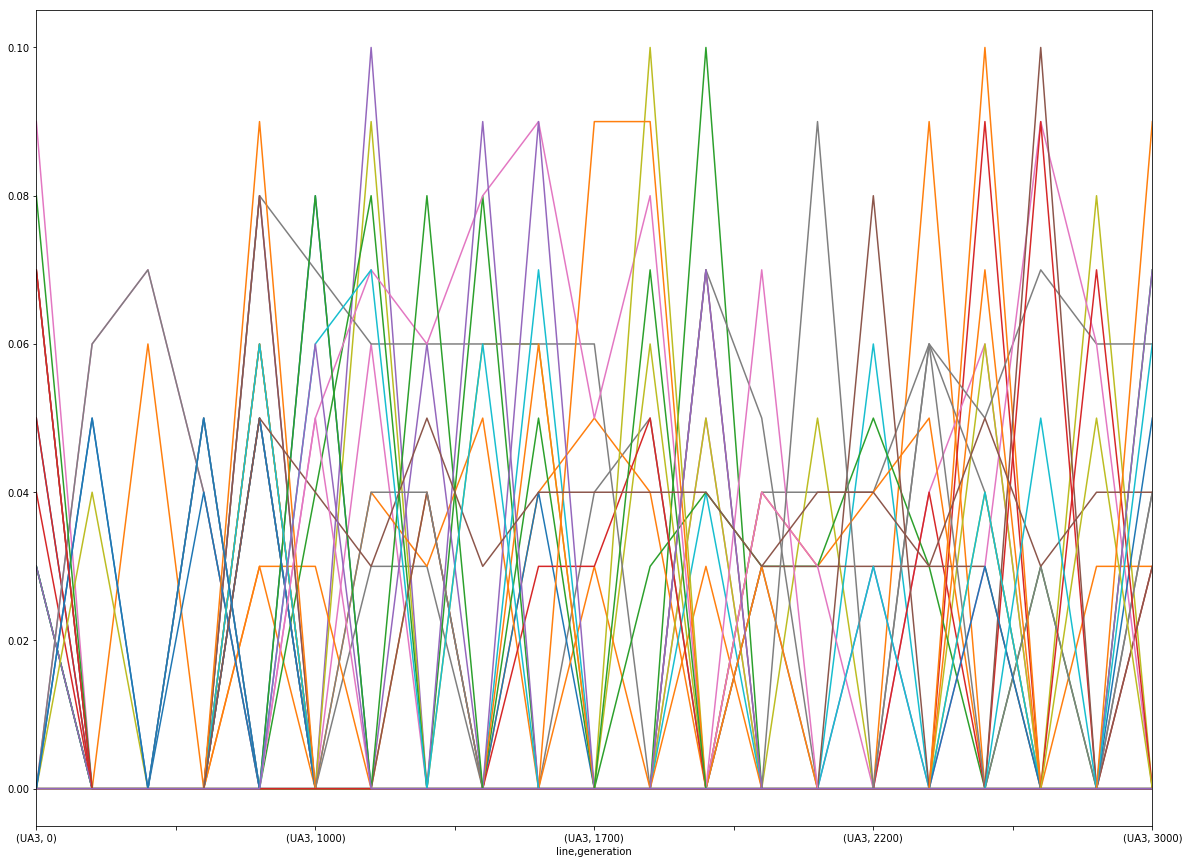

In [271]:
# To subset mutations that never increase beyond 10% across all time points
dvh_df[dvh_df.mask(dvh_df > 0.1).dropna(axis = 1).columns].plot(figsize = (20,15), legend=False)
mm_df[mm_df.mask(mm_df > 0.1).dropna(axis = 1).columns].plot(figsize = (20,15), legend=False)
dvplasmid_df[dvplasmid_df.mask(dvplasmid_df > 0.1).dropna(axis = 1).columns].plot(figsize = (20,15), legend=False)

### Genotype identification based on clonal isolates' mutations

In [191]:
ua3_iso = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/ISO-ua3_mutev.csv')

In [192]:
new_ua3_iso = pd.merge(new_ua3, ua3_iso, on=('genome_id', 'position')).drop(['line_y', 'generation_y', 'entry_type_y', 'entry_id_y', 'evidence_id_y', 
                                          'mutation_detail_y', 'frequency_y', 'gene_product_y', 'evidence_type_y','reject_y', 
                                          'prediction_y', 'polymorphism_frequency_y', 'REF_y', 'ALT_y', 'major_cov_y', 'minor_cov_y', 
                                          'total_cov_y', 'ra_cov_y', 'jc_cov_y', 'mc_cov_y'], axis=1)

In [193]:
new_ua3_iso['sample_y'].unique()

array(['ISO-6', 'ISO-8', 'ISO-9', 'ISO-11', 'ISO-2', 'ISO-12', 'ISO-13',
       'ISO-14', 'ISO-18', 'ISO-20', 'ISO-21', 'ISO-37'], dtype=object)

In [264]:
#Individual plots 
for iso in new_ua3_iso['sample_y'].unique():
    df = new_ua3_iso[new_ua3_iso['sample_y'] == iso].pivot_table(index=['genome_id', 'generation_x'], columns='polymorphism', values='polymorphism_frequency_x')
    iso_dvh = dropallna_col(df.loc['NC_002937'])
    iso_dvh.plot(figsize = (20,15), legend=True, title='NC_002937: DvH '+ iso + ' Polymorphism Frequencies in UA3')
    plt.savefig('figures/grc2019ua3dvhcorrected_' + iso + '.png')
    plt.close()
    iso_dvplasmid = dropallna_col(df.loc['NC_005863'])
    iso_dvplasmid.plot(figsize = (20,15), legend=True, title='NC_005863: Dv plasmid '+ iso + ' Polymorphism Frequencies in UA3')
    plt.savefig('figures/grc2019ua3dvplasmidcorrected_' + iso + '.png')
    plt.close()
    #iso_mm = dropallna_col(df.loc['NC_005791'])
    #iso_mm.plot(figsize = (20,15), legend=True, title='NC_005791: Mm '+ iso + ' Polymorphism Frequencies in UA3')
    #plt.savefig('figures/grc2019ua3mmcorrected_' + iso + '.png')
    #plt.close()

In [265]:
dvh_iso = new_ua3_iso[new_ua3_iso['genome_id'] == 'NC_002937'].pivot_table(index=['sample_y', 'generation_x'], columns='polymorphism', values='polymorphism_frequency_x')
dvh_iso
#Note: frequencies are UA3 *population* frequencies, therefore are the same for all isolates.

polymorphism           1144620 C  1191167 .  1313341 C  1376015 T  1426830 G  \
sample_y generation_x                                                          
ISO-11   0              0.991039   1.000000   1.000000        NaN   1.000000   
         100            1.000000   1.000000   1.000000        NaN   1.000000   
         300            1.000000   1.000000   0.992663   0.669448   1.000000   
         500            1.000000   1.000000   0.992901   0.711024   1.000000   
         780            1.000000   1.000000   1.000000   0.714966   1.000000   
         1000           1.000000   0.998553   0.998418        NaN   1.000000   
         1100           0.994836   1.000000   1.000000   0.049274   1.000000   
         1200           1.000000   0.998037   1.000000   0.026533   1.000000   
         1500           1.000000   1.000000   0.997338   0.088143   1.000000   
         1600           0.997474   1.000000   1.000000   0.099443   1.000000   
         1700           1.000000   1.000000   1.000000   0.053264   1.000000   
         1800           1.000000   1.000000   0.998171   0.029125   0.998739   
         1900           0.998055   1.000000   1.000000   0.017788   1.000000   
         2000           0.997571   1.000000   1.000000   0.064937   1.000000   
         2100           0.997783   1.000000   1.000000   0.032851   1.000000   
         2200           0.995427   1.000000   1.000000        NaN   1.000000   
         2300           0.998559   1.000000   1.000000        NaN   1.000000   
         2400           1.000000   1.000000   0.998085        NaN   1.000000   
         2600           1.000000   0.997526   1.000000        NaN   1.000000   
         2800           0.998737   1.000000   0.997371        NaN   1.000000   
         3000           0.999572   0.999613   0.999574   0.023756   0.999306   
ISO-12   0              0.991039   1.000000   1.000000        NaN   1.000000   
         100            1.000000   1.000000   1.000000        NaN   1.000000   
         300            1.000000   1.000000   0.992663        NaN   1.000000   
         500            1.000000   1.000000   0.992901        NaN   1.000000   
         780            1.000000   1.000000   1.000000        NaN   1.000000   
         1000           1.000000   0.998553   0.998418        NaN   1.000000   
         1100           0.994836   1.000000   1.000000        NaN   1.000000   
         1200           1.000000   0.998037   1.000000        NaN   1.000000   
         1500           1.000000   1.000000   0.997338        NaN   1.000000   
...                          ...        ...        ...        ...        ...   
ISO-8    1900           0.998055   1.000000   1.000000        NaN   1.000000   
         2000           0.997571   1.000000   1.000000        NaN   1.000000   
         2100           0.997783   1.000000   1.000000        NaN   1.000000   
         2200           0.995427   1.000000   1.000000        NaN   1.000000   
         2300           0.998559   1.000000   1.000000        NaN   1.000000   
         2400           1.000000   1.000000   0.998085        NaN   1.000000   
         2600           1.000000   0.997526   1.000000        NaN   1.000000   
         2800           0.998737   1.000000   0.997371        NaN   1.000000   
         3000           0.999572   0.999613   0.999574        NaN   0.999306   
ISO-9    0              0.991039   1.000000   1.000000        NaN   1.000000   
         100            1.000000   1.000000   1.000000        NaN   1.000000   
         300            1.000000   1.000000   0.992663        NaN   1.000000   
         500            1.000000   1.000000   0.992901        NaN   1.000000   
         780            1.000000   1.000000   1.000000        NaN   1.000000   
         1000           1.000000   0.998553   0.998418        NaN   1.000000   
         1100           0.994836   1.000000   1.000000        NaN   1.000000   
         1200           1.000000   0.998037   1.000000        NaN   1.000000   


In [266]:
def filter_mutations_per_isolate(df):
    '''Must input df with 2-level indexes: level[0] = sample, level[1] = generation'''
    mutations_per_isolate = []
    for sample in df.index.levels[0]:
        mutations_per_isolate.append(dropallna_col(df.loc[sample]).columns)
    return mutations_per_isolate

def get_least_mutations_index(mutations_per_isolate, df):
    num_mutations = len(df.columns)
    for idx, mut in enumerate(mutations_per_isolate):
        if len(mut) < num_mutations:
            num_mutations = len(mut)
            mut_idx = idx
    return mut_idx

def get_common_muts(mutations_per_isolate, mut_idx):
    counts = {}
    for iso_mut in mutations_per_isolate[mut_idx]:
        counts[iso_mut] = 0
        for mut in mutations_per_isolate:
            if iso_mut in mut:
                counts[iso_mut] += 1
    common_muts = [key for key, value in counts.items() if value == len(mutations_per_isolate)]
    return common_muts

In [267]:
dvh_iso_muts = filter_mutations_per_isolate(dvh_iso)
dvh_common_muts = get_common_muts(dvh_iso_muts, get_least_mutations_index(dvh_iso_muts, dvh_iso))
dvh_common_muts

['2083305 C', '2982788 C', '3276860 C', '3455727 T']

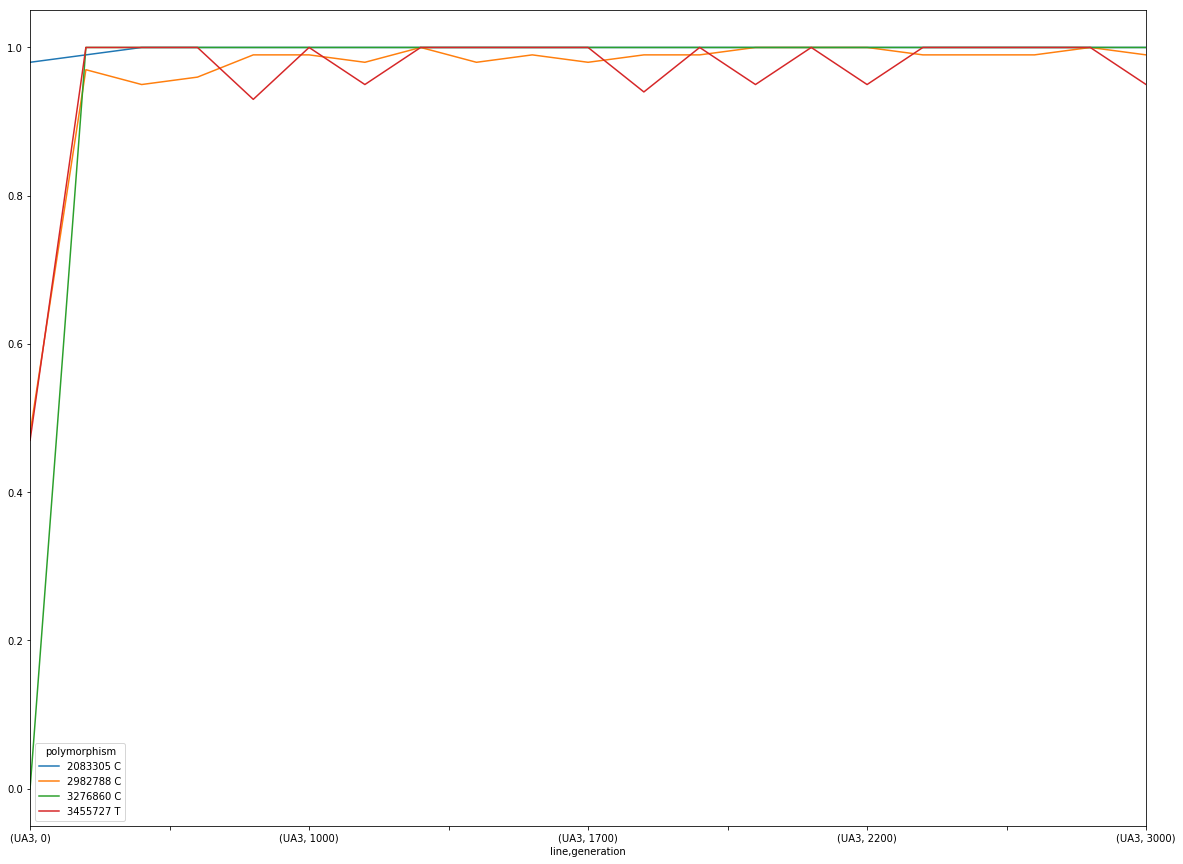

In [268]:
dvh_df[dvh_common_muts].plot(figsize = (20,15), legend=True)